# Ford GoBike System Dataset Exploration
## By Precious Okon

## Introduction
> Introduce the dataset

This project is on the exploration of Ford GoBike Dataset to obtain various insights, findings and visualize on them

This data set contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It contains 183412 rows and 16 variables on each bike Id. 

## Preliminary Wrangling


In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [7]:
# loading the dataset into a pandas dataframe
bike = pd.read_csv('fordgo-bike-data.csv')

In [12]:
#opening the dataset
bike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [13]:
#overview of data shape and composition
print(bike.shape)
print(bike.dtypes)
print(bike.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

## Data Cleaning

1. Convert start time and end time column from string to datetime

In [13]:
#changing the start_time and end_time column from string to datetime
bike[['start_time','end_time']] = bike[['start_time','end_time']].apply(pd.to_datetime)


2. Checking for null values in member gender column and replacing the null values with the most frequent category

In [15]:
#getting the unique value of member_gender column
bike.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [16]:
#Using the fillna function to replace the null values with the most frequent category which is Male
#Since its a categorical data, I have to replace the null values with the most frequent category 
bike = bike.fillna(bike['member_gender'].value_counts().index[0])

3. Converting the column member gender, user type and bike share from string to ordered categorical datatype

In [17]:
# convert member_gender, user_type, and bike_share_for_all_trip columns into ordered categorical types
ordinal_var_dict = {'member_gender': ['Male','Female','Other'],
                    'user_type': ['Customer', 'Subscriber'],
                    'bike_share_for_all_trip': ['No', 'Yes']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)

4. Converting the start staion id column, end station id column, member birth year from string to numeric datatype

In [18]:
#Changing the start_station_id, end_station_id, member_birth_year column from string to numerical data
bike[['start_station_id', 'end_station_id', 'member_birth_year']] = bike[['start_station_id', 
                        'end_station_id', 'member_birth_year']].apply(pd.to_numeric, errors='coerce')


5. Dropping rows with null values in our dataset

In [19]:
#drop rows with null values
bike.dropna(inplace=True)

In [20]:
#checking if it was dropped
bike.isnull().any().sum()

0

In [21]:
#Change bike id datatype from float to string
bike['bike_id'] =bike.bike_id.astype(str)

6. Extracting the hour, day, month from the start and end date and putting them into a new column

In [14]:
#Using datetime as dt 
bike['start_day'] = bike['start_time'].dt.day_name()
bike['start_month'] = bike['start_time'].dt.month_name()
# bike['start_year'] = bike['start_time'].dt.year
bike['start_hr'] = bike['start_time'].dt.hour
bike['start_hr'] = bike.start_hr.astype(str)


bike['end_day'] = bike['end_time'].dt.day_name()
bike['end_month'] = bike['end_time'].dt.month_name()
bike['end_hr'] = bike['end_time'].dt.hour
bike['end_hr'] = bike.end_hr.astype(str)

7. Converting start day, end day, start month, end month, start hr, end hour to ordered categorical datatype

In [15]:
# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'start_month': ['Februar'],
                    'end_month': ['February', 'March'],
                    'start_hr': [str(i) for i in range(0,24)],
                    'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)

In [24]:
#Finally checking our datatypes to check if the columns are all in their right datatype
bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
start_day                        category
start_month                      category
start_hr                         category
end_day                          category
end_month                        category
end_hr                           category
dtype: object

In [25]:
#checking the descriptive statistics of our dataset
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,2001.000000


In [26]:
#Final dataset
bike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Thursday,NaN,17,Friday,March,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Thursday,NaN,12,Friday,March,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,Thursday,NaN,17,Friday,March,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,Thursday,NaN,23,Friday,March,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,Thursday,NaN,23,Friday,March,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,Subscriber,1996.0,Male,No,Friday,NaN,0,Friday,February,0
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,Subscriber,1984.0,Male,No,Friday,NaN,0,Friday,February,0
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,Subscriber,1990.0,Male,Yes,Friday,NaN,0,Friday,February,0
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,Subscriber,1988.0,Male,No,Friday,NaN,0,Friday,February,0


### What is the structure of your dataset?


The Ford Gobike Dataset contains records from 183412 rides and 16 variables which was later dropped to 174952 rides and 22 variables. 

The columns include:
start_time and end_time column which are datetime64 datatype
duration_sec which is int64 datatype

start_station_id, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, end station id and member birth year which are float64 datatype

start station name, bike id and end station name which are string datatype

user type, member gender and bike for all share trip which are category datatype

New Columns:
start_day, start month, start hour, end day, end month and end hour column all category datatype




### What is/are the main feature(s) of interest in your dataset?

My most interest id to find out the duration each gender takes on rides and which particular day each gender like going on rides

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The duration features, Gender features, start day and End Day features

## Univariate Exploration

 In this section I will explore individual variables. 


## Question 

#### Checking the distribution of duration per seconds

#### Visualization

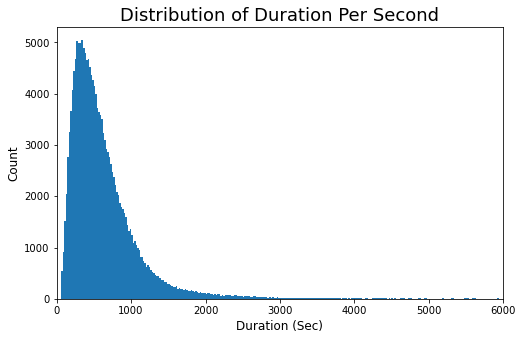

In [27]:
#plotting the graph of distribition of gender
binsize = 20
bins = np.arange(20, bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (Sec)', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title ('Distribution of Duration Per Second', fontsize = 18)
plt.xlim(0, 6000);

#### Observation

It can be observed that the duration has a long tailed distribution and most of the rides took place betwwen 0 - 1000 seconds which are short rides and they are fewer ride with long duration

## Question 

#### Checking the distribution of End months

#### Visualization

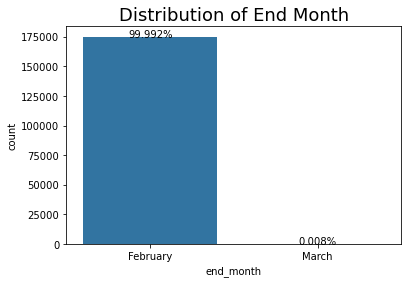

In [28]:
#plotting the graph to show the dictribution of End Month
ax = sns.countplot(data = bike, x = 'end_month',  color=sns.color_palette()[0], order=bike.end_month.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.title('Distribution of End Month', fontsize = 18)
plt.show();

#### Observation

Most ride ended in February with over 99% 

## Question 

Checking the distribution of Start Day and end Day

#### Visualization

In [ ]:
#function
def countplot(x, **kwargs):
    default_color = sns.color_palette()[0]
    sns.countplot(x=x, color=default_color)

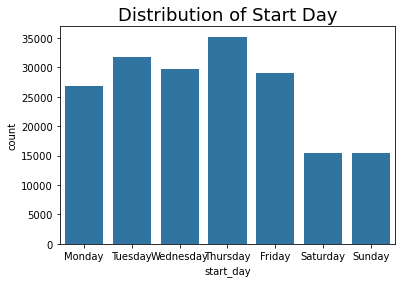

In [16]:
#Plotting the distribution of start day 
default_color = sns.color_palette()[0]
sns.countplot(data = bike, x = 'start_day',  color=default_color)
plt.title('Distribution of Start Day', fontsize = 18)
plt.show();

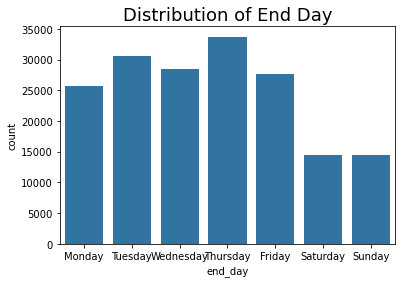

In [30]:
#plotting the distribution of end Day
default_color = sns.color_palette()[0]
sns.countplot(data = bike, x = 'end_day',  color=default_color)
plt.title('Distribution of End Day', fontsize = 18)
plt.show();

#### Observation

Most ride took place on Thurdays which is and most ride took place during the week days while less ride took place during weekend

## Question 

Checking the distribution of Start hour and end hour

#### Visualization

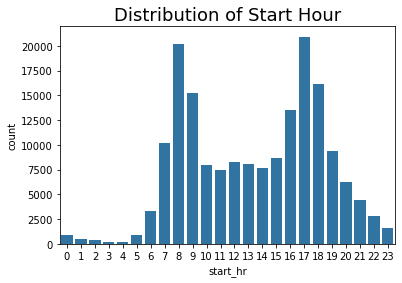

In [31]:
#plotting the distribution of Start Hour
default_color = sns.color_palette()[0]
sns.countplot(data = bike, x = 'start_hr',  color=default_color)
plt.title('Distribution of Start Hour', fontsize = 18)
plt.show();


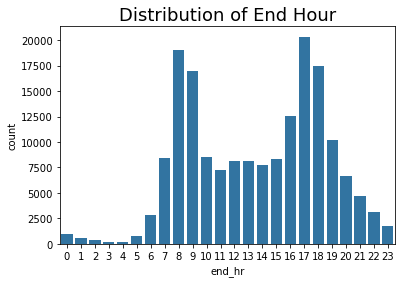

In [32]:
#plotting the distribution of End Hour
default_color = sns.color_palette()[0]
sns.countplot(data = bike, x = 'end_hr',  color=default_color)
plt.title('Distribution of End Hour', fontsize = 18)
plt.show();

#### Observation

As observed in the 2 plot above the 8th, 9th have high trips which indicate morning rush to work and the 17th and 18th hour which indicated rushing hours home from work

## Question 

To know the most gender that took the most ride

#### Visualization

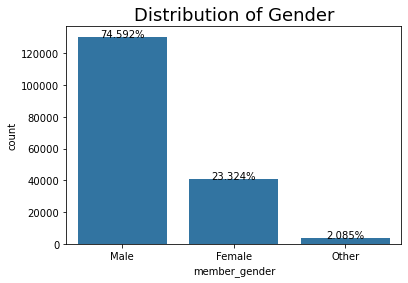

In [33]:
# Distribution of Gender
ax = sns.countplot(data = bike, x = 'member_gender',  color=sns.color_palette()[0], order=bike.member_gender.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.title ('Distribution of Gender', fontsize = 18)
plt.show();

#### Observation

The male Gender took the most ride with over 74% frequency

## Question 

Which user type took the most ride

#### Visualization

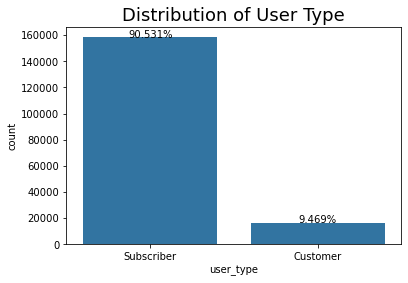

In [34]:
# Distribution of User Type
ax = sns.countplot(data = bike, x = 'user_type',  color=sns.color_palette()[0], order=bike.user_type.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.title ('Distribution of User Type', fontsize = 18)
plt.show();


#### Observation

Subcribers took the most ride than Customers

## Question 

To know the Distribution of Bike Share for all Trip

#### Visualization

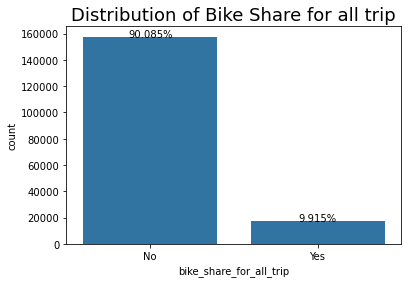

In [35]:
# Distribution of Bike share for all Trip
ax = sns.countplot(data = bike, x = 'bike_share_for_all_trip',  color=sns.color_palette()[0], order=bike.bike_share_for_all_trip.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.title ('Distribution of Bike Share for all trip', fontsize = 18)
plt.show();


#### Observation

Over 90% of users were not allowed to share their ride

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

For Duaration per second visualization, I had to change it to a smaller bin size of 20 and also set the xlimit from 0 to 6000 and in other to clearly depict the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I change some datatype of the data from object to category, from object to datetime and to other forms in other to enable easy visualization according to the datatype

## Bivariate Exploration

> In this section,  I will investigate relationships between pairs of variables


## Question 

What is the relationship between user type and start hour

#### Visualization

Text(0.5, 1.0, 'Relationship Between User Type and Start Hour')

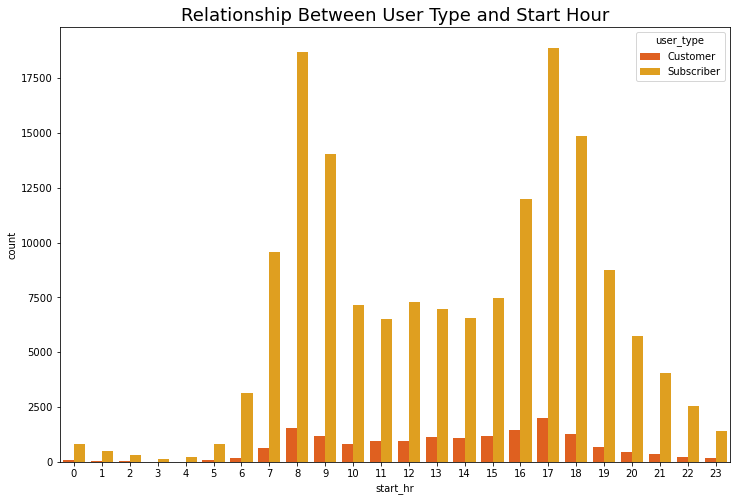

In [36]:
#Plot to know the relationship between user type and start hr
plt.figure(figsize = [12, 8])
sns.countplot(data = bike, x = 'start_hr', hue = 'user_type', palette = 'autumn')
plt.title ('Relationship Between User Type and Start Hour', fontsize = 18)


#### Observation
More subcribers started ride at 8th and 17th hour

## Question 

What is the relationship between start day and User type

#### Visualization

Text(0.5, 1.0, 'Relationship Between Start Day and User Type')

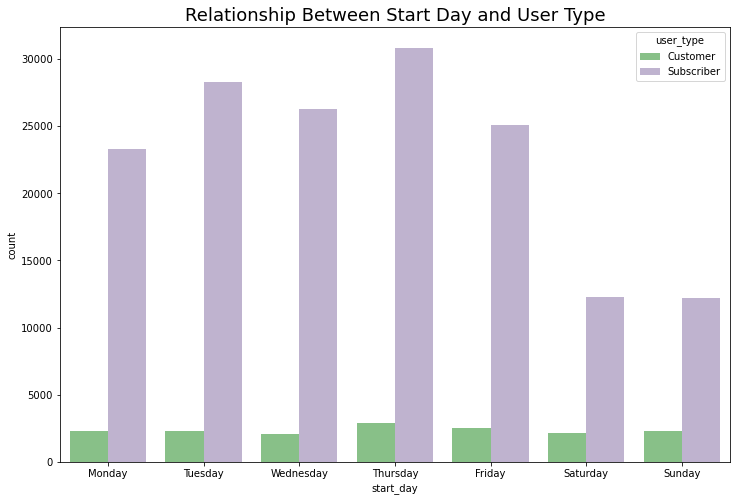

In [37]:
#Plot to know the relationship between user type and start hr
plt.figure(figsize = [12, 8])
sns.countplot(data = bike, x = 'start_day', hue = 'user_type', palette = 'Accent')
plt.title ('Relationship Between Start Day and User Type', fontsize = 18)

#### Observation

Subscribers mostly started ride thursday which is weekdays

## Question 

What is the relationship between end month and user type

#### Visualization

Text(0.5, 1.0, 'Relationship Between End Month and User type')

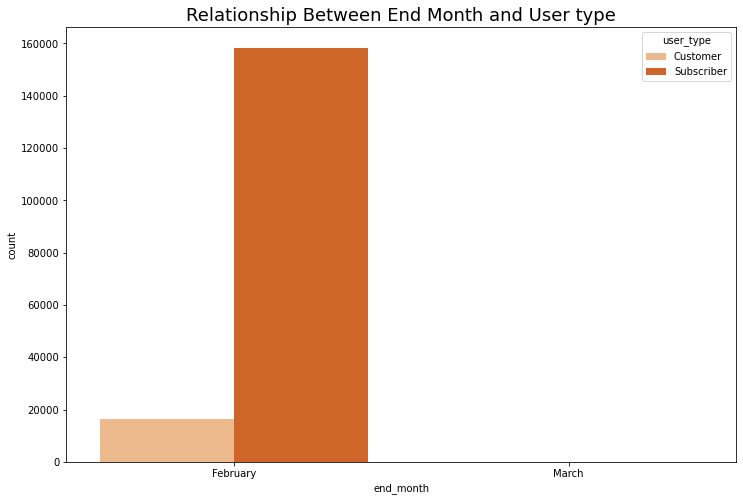

In [38]:
#Plot to know the relationship between user type and start hr
plt.figure(figsize = [12, 8])
sns.countplot(data = bike, x = 'end_month', hue = 'user_type', palette = 'Oranges')
plt.title ('Relationship Between End Month and User type', fontsize = 18)

#### Observation

Subscriber generally had more ride than customers

## Question 

What is the relationship between member gender and user type

#### Visualization

Text(0.5, 1.0, 'Relationship Between Member Gender and User Type')

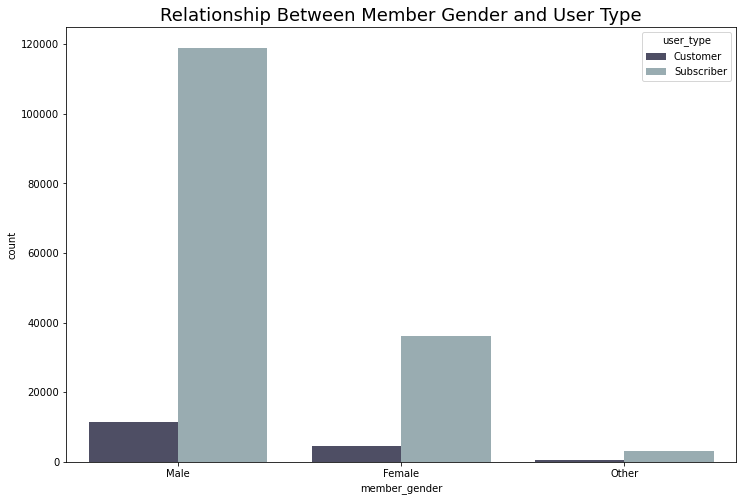

In [39]:
#Plot to know the relationship between user type and start hr
plt.figure(figsize = [12, 8])
sns.countplot(data = bike, x = 'member_gender', hue = 'user_type', palette = 'bone')
plt.title ('Relationship Between Member Gender and User Type', fontsize = 18)

#### Observation

More Subscribers were Male than female

## Question

What is the relationship between user type and bike share for all trip

#### Visualization

Text(0.5, 1.0, 'Relationship Between User Type and Bike share for all trip')

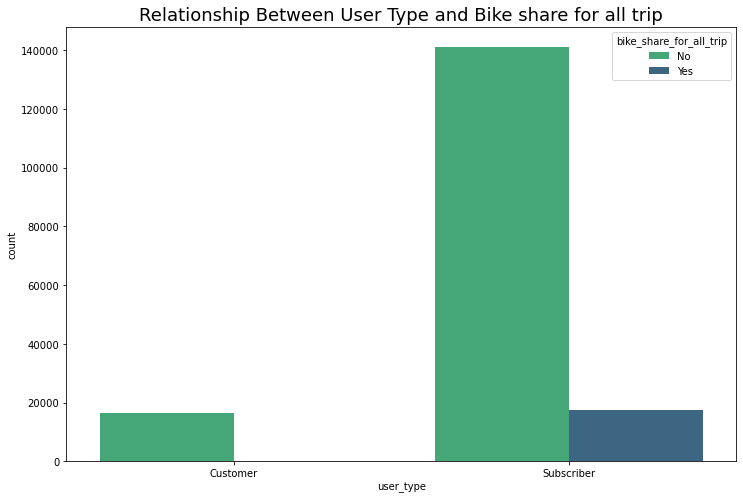

In [40]:
#Plot to know the relationship between user type and bike share for all trip
plt.figure(figsize = [12, 8])
sns.countplot(data = bike, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'viridis_r')
plt.title ('Relationship Between User Type and Bike share for all trip', fontsize = 18)

#### Observation

More Subscribers shared their bike and no customer shared theirs

## Question

What is the relationship between member gender and start hour

#### Visualization

Text(0.5, 1.0, 'Relationship Between Member Gender and Start Hour')

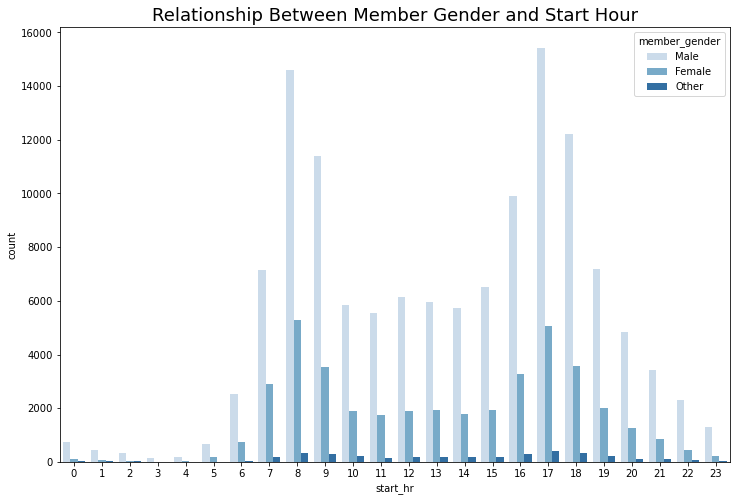

In [41]:
#Plot to know the relationship between user type and start hr
plt.figure(figsize = [12, 8])
sns.countplot(data = bike, x = 'start_hr', hue = 'member_gender', palette = 'Blues')
plt.title ('Relationship Between Member Gender and Start Hour', fontsize = 18)

#### Observation

Male alway start rides earlier and more than female

## Question

What is the relationship between start day and end day as regards to duration

#### Visualization

<AxesSubplot:xlabel='end_day', ylabel='duration_sec'>

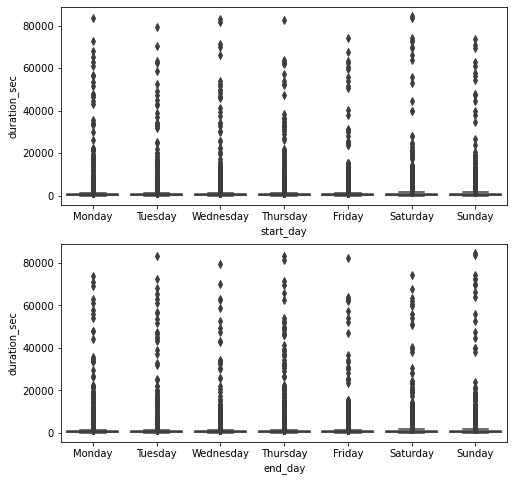

In [42]:
#plotting 2 subplots to know the relationship between start day and end day as regards to duration
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(2, 1, 1)
sns.boxplot(data = bike, x = 'start_day', y = 'duration_sec')

# subplot 2: clarity vs. cut
ax = plt.subplot(2, 1, 2)
sns.boxplot(data = bike, x = 'end_day', y = 'duration_sec')


#### Observation

There is a positive relationship between start and end day as regard duration. As start day increases, end day tends to decrease and vice versa 

### Some of the relationships I observed in this part of the investigation. 

I checked the between:

start day and end day as regards to duration

member gender and start hour

user type and start hour and other relationships to see if one relationship affect the other or not



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Question 

Which Gender has the longer ride duration

#### Visualization

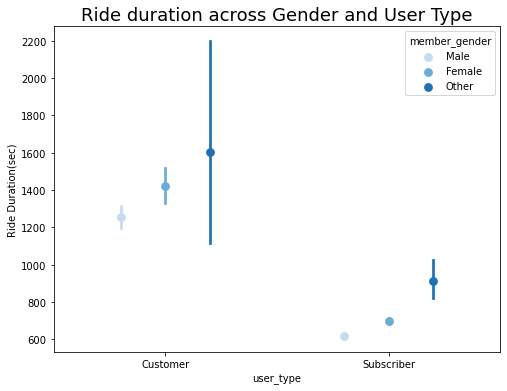

In [43]:
#plotting to show the relationship of duration across member gender and user type
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = bike, x = 'user_type', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Ride duration across Gender and User Type', fontsize =18)
plt.ylabel('Ride Duration(sec)')
#plt.yscale('log')
#plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

#### Observation

It can be observed that Customers who were identified as Other gender had longer ride duration than male and female customers

## Question 

What time of the day do other gender start their ride and the duration of the ride at that time

#### Visualization

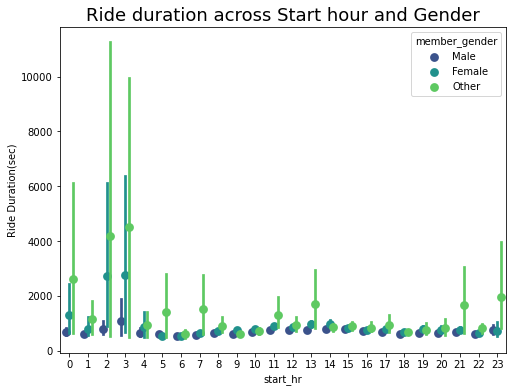

In [44]:
#plotting to show the relationship of duration across member gender and user type
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = bike, x = 'start_hr', y = 'duration_sec', hue = 'member_gender',
           palette = 'viridis', linestyles = '', dodge = 0.4)
plt.title('Ride duration across Start hour and Gender', fontsize = 18)
plt.ylabel('Ride Duration(sec)')
ax.set_yticklabels([],minor = True)
plt.show();

#### Observation

It can be observed that other gender has long duration when the start their ride with 2nd or 3rd hour

## Question 

What time of the day do other gender end their ride

#### Visualization

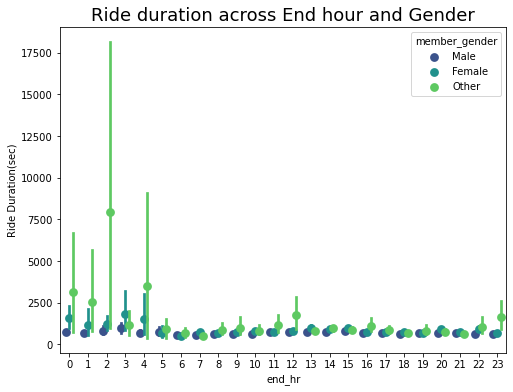

In [45]:
#plotting to show the relationship of duration across member gender and user type
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = bike, x = 'end_hr', y = 'duration_sec', hue = 'member_gender',
           palette = 'viridis', linestyles = '', dodge = 0.4)
plt.title('Ride duration across End hour and Gender', fontsize = 18)
plt.ylabel('Ride Duration(sec)')
ax.set_yticklabels([],minor = True)
plt.show();

#### Observation

It can be observed that other gender ends their trip by the 2nd hour or 4th hour 

## Question

Which day of the weeks do most Gender like going and ride and how long does the ride takes

#### Visualization

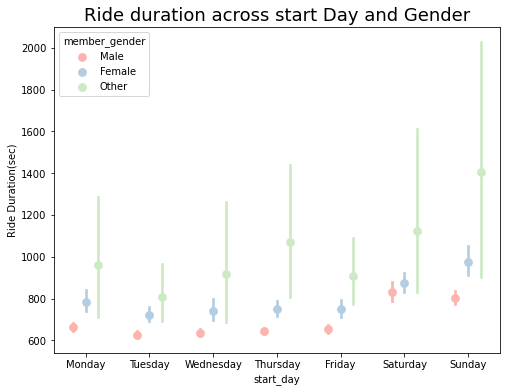

In [46]:
#plotting to show the relationship of duration across member gender and user type
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = bike, x = 'start_day', y = 'duration_sec', hue = 'member_gender',
           palette = 'Pastel1', linestyles = '', dodge = 0.4)
plt.title('Ride duration across start Day and Gender', fontsize = 18)
plt.ylabel('Ride Duration(sec)')
ax.set_yticklabels([],minor = True)
plt.show();

#### Observation

It can be observed that other genders prefer going on ride during weekends especially on Sunday and they usually have ride duration of over 1800 per seconds during weekends

###  Some of the relationships I observed in this part of the investigation. 

I observed the relationship of Duration across otheir variables like start hour, end hour, start day, gender and User type



## Conclusions

I derived the following findings from my Ford GoBike System Data Exploration

* The Data provided entails information for only the month of February and March


* There were more male users than female users


* Most users started their ride on the 8th, 9th which indicate morning rush to work and the ended their rides on 17th and 18th
  hour which indicate rushing hours home from work
  

* The user type Subcribers took the most ride than Customers


* More Subscribers shared their bike and no customer was allowed to shared their ride


* They were more rides on Tuesday and Thursdays which are weekdays


* The Gender category 'Other' prefer going on ride during weekends especially on Sunday and they usually have ride duration of 
  over 1800 per seconds during weekends
  
  
* Other gender has long duration when the start their ride at the 2nd or 3rd hour and they also had longer ride duration than
  male and female user
  

* Male alway start rides earlier than female and other gender


* There is a positive relationship between start day, end day as regard duration. As start day increases, end day tends to 
  decrease and vice versa.
  
  